In [1]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/5
235/235 [==============================] - 9s 28ms/step - loss: 0.6941 - val_loss: 0.6941
Epoch 2/5
235/235 [==============================] - 4s 18ms/step - loss: 0.6940 - val_loss: 0.6940
Epoch 3/5
235/235 [==============================] - 3s 13ms/step - loss: 0.6939 - val_loss: 0.6939
Epoch 4/5
235/235 [==============================] - 3s 11ms/step - loss: 0.6938 - val_loss: 0.6938
Epoch 5/5
235/235 [==============================] - 3s 11ms/step - loss: 0.6938 - val_loss: 0.6937


In [2]:
from keras.layers import Input, Dense
from keras.models import Model

# Define the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# Input placeholder
input_img = Input(shape=(784,))
# Encoded representation
encoded = Dense(128, activation='relu')(input_img)  # New hidden layer with 128 neurons
encoded = Dense(encoding_dim, activation='relu')(encoded)  # Encoding layer

# Decoded representation
decoded = Dense(128, activation='relu')(encoded)  # New hidden layer with 128 neurons
decoded = Dense(784, activation='sigmoid')(decoded)  # Decoding layer

# Autoencoder model
autoencoder = Model(input_img, decoded)

# Compile autoencoder
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Load and preprocess Fashion MNIST dataset
from keras.datasets import fashion_mnist
import numpy as np

(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
loss = autoencoder.evaluate(x_test, x_test)
print(f'Test loss: {loss}')


Epoch 1/5
235/235 [==============================] - 7s 25ms/step - loss: 0.6945 - val_loss: 0.6945
Epoch 2/5
235/235 [==============================] - 5s 19ms/step - loss: 0.6944 - val_loss: 0.6944
Epoch 3/5
235/235 [==============================] - 8s 34ms/step - loss: 0.6943 - val_loss: 0.6943
Epoch 4/5
235/235 [==============================] - 4s 18ms/step - loss: 0.6942 - val_loss: 0.6942
Epoch 5/5
313/313 [==============================] - 3s 9ms/step - loss: 0.6941
Test loss: 0.6940664052963257


In [3]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam
from keras.datasets import fashion_mnist
import numpy as np

# Define the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# Input placeholder
input_img = Input(shape=(784,))
# Encoded representation
encoded = Dense(128, activation='relu')(input_img)  # New hidden layer with 128 neurons
encoded = Dense(encoding_dim, activation='relu')(encoded)  # Encoding layer

# Decoded representation
decoded = Dense(128, activation='relu')(encoded)  # New hidden layer with 128 neurons
decoded = Dense(784, activation='sigmoid')(decoded)  # Decoding layer

# Autoencoder model
autoencoder = Model(input_img, decoded)

# Compile autoencoder with Adam optimizer and adjusted learning rate
autoencoder.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Load and preprocess Fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Train the autoencoder with adjusted batch size and number of epochs
history = autoencoder.fit(x_train, x_train,
                          epochs=15,  # Increased number of epochs
                          batch_size=128,  # Adjusted batch size
                          shuffle=True,
                          validation_data=(x_test, x_test))

# Evaluate performance on test data
loss, accuracy = autoencoder.evaluate(x_test, x_test)
print(f'Test loss: {loss:.4f}')


Epoch 1/15
469/469 [==============================] - 16s 28ms/step - loss: 0.3447 - accuracy: 0.0110 - val_loss: 0.3056 - val_accuracy: 0.0156
Epoch 2/15
469/469 [==============================] - 11s 23ms/step - loss: 0.2970 - accuracy: 0.0144 - val_loss: 0.2953 - val_accuracy: 0.0157
Epoch 3/15
469/469 [==============================] - 14s 29ms/step - loss: 0.2894 - accuracy: 0.0170 - val_loss: 0.2891 - val_accuracy: 0.0209
Epoch 4/15
469/469 [==============================] - 8s 17ms/step - loss: 0.2853 - accuracy: 0.0209 - val_loss: 0.2859 - val_accuracy: 0.0225
Epoch 5/15
469/469 [==============================] - 5s 12ms/step - loss: 0.2827 - accuracy: 0.0227 - val_loss: 0.2839 - val_accuracy: 0.0216
Epoch 6/15
469/469 [==============================] - 8s 17ms/step - loss: 0.2809 - accuracy: 0.0236 - val_loss: 0.2827 - val_accuracy: 0.0244
Epoch 7/15
469/469 [==============================] - 8s 17ms/step - loss: 0.2795 - accuracy: 0.0249 - val_loss: 0.2812 - val_accuracy: 0.0

313/313 [==============================] - 1s 3ms/step


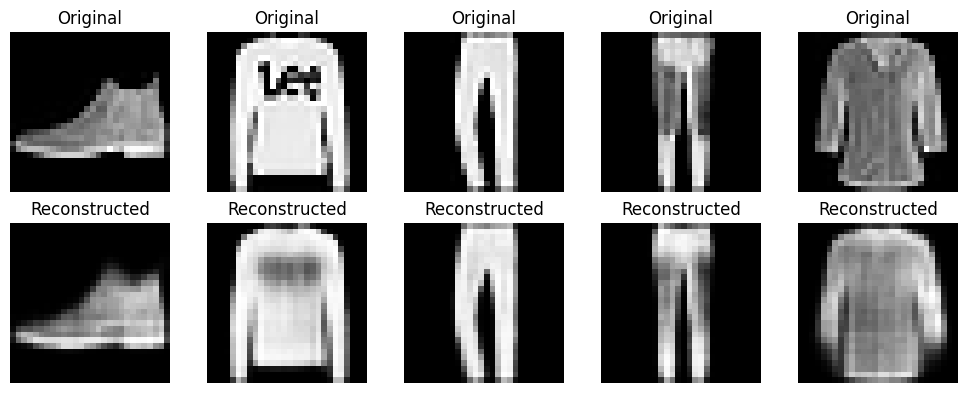

In [4]:
import matplotlib.pyplot as plt

# Predict on test data
decoded_imgs = autoencoder.predict(x_test)

# Number of images to display
num_images = 5

# Plot original images and reconstructed images
plt.figure(figsize=(10, 4))

for i in range(num_images):
    # Original images
    plt.subplot(2, num_images, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title('Original')
    plt.axis('off')

    # Reconstructed images
    plt.subplot(2, num_images, i + 1 + num_images)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [5]:
from keras.layers import Input, Dense
from keras.models import Model

# Define the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# Input placeholder
input_img = Input(shape=(784,))

# Encoder layers
encoded = Dense(128, activation='relu')(input_img)  # Add a hidden layer with 128 neurons
encoded = Dense(encoding_dim, activation='relu')(encoded)  # Encoding layer

# Decoder layers
decoded = Dense(128, activation='relu')(encoded)  # Add a hidden layer with 128 neurons
decoded = Dense(784, activation='sigmoid')(decoded)  # Decoding layer

# Autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Load and preprocess Fashion MNIST dataset
from keras.datasets import fashion_mnist
import numpy as np

(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Introducing noise to the data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Train the autoencoder
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))


Epoch 1/10
235/235 [==============================] - 6s 19ms/step - loss: 0.6971 - val_loss: 0.6970
Epoch 2/10
235/235 [==============================] - 5s 22ms/step - loss: 0.6969 - val_loss: 0.6967
Epoch 3/10
235/235 [==============================] - 4s 18ms/step - loss: 0.6966 - val_loss: 0.6965
Epoch 4/10
235/235 [==============================] - 4s 18ms/step - loss: 0.6963 - val_loss: 0.6962
Epoch 5/10
235/235 [==============================] - 5s 23ms/step - loss: 0.6961 - val_loss: 0.6960
Epoch 6/10
235/235 [==============================] - 4s 17ms/step - loss: 0.6958 - val_loss: 0.6957
Epoch 7/10
235/235 [==============================] - 5s 20ms/step - loss: 0.6956 - val_loss: 0.6955
Epoch 8/10
235/235 [==============================] - 5s 23ms/step - loss: 0.6953 - val_loss: 0.6952
Epoch 9/10
235/235 [==============================] - 4s 17ms/step - loss: 0.6951 - val_loss: 0.6950
Epoch 10/10
235/235 [==============================] - 4s 17ms/step - loss: 0.6949 - val_lo

In [6]:
from keras.layers import Input, Dense
from keras.models import Model

# Define the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# Input placeholder
input_img = Input(shape=(784,))

# Encoder layers
encoded = Dense(256, activation='relu')(input_img)  # Add a hidden layer with 128 neurons
encoded = Dense(encoding_dim, activation='relu')(encoded)  # Encoding layer

# Decoder layers
decoded = Dense(256, activation='relu')(encoded)  # Add a hidden layer with 128 neurons
decoded = Dense(784, activation='sigmoid')(decoded)  # Decoding layer

# Autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Load and preprocess Fashion MNIST dataset
from keras.datasets import fashion_mnist
import numpy as np

(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Introducing noise to the data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Train the autoencoder
history = autoencoder.fit(x_train_noisy, x_train,
                          epochs=10,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test_noisy, x_test_noisy))



Epoch 1/10
235/235 [==============================] - 7s 27ms/step - loss: 0.6938 - val_loss: 0.6937
Epoch 2/10
235/235 [==============================] - 7s 31ms/step - loss: 0.6936 - val_loss: 0.6935
Epoch 3/10
235/235 [==============================] - 6s 26ms/step - loss: 0.6934 - val_loss: 0.6933
Epoch 4/10
235/235 [==============================] - 7s 31ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 5/10
235/235 [==============================] - 6s 27ms/step - loss: 0.6930 - val_loss: 0.6929
Epoch 6/10
235/235 [==============================] - 7s 30ms/step - loss: 0.6928 - val_loss: 0.6927
Epoch 7/10
235/235 [==============================] - 6s 26ms/step - loss: 0.6926 - val_loss: 0.6925
Epoch 8/10
235/235 [==============================] - 7s 29ms/step - loss: 0.6924 - val_loss: 0.6923
Epoch 9/10
235/235 [==============================] - 6s 27ms/step - loss: 0.6923 - val_loss: 0.6922
Epoch 10/10
235/235 [==============================] - 6s 27ms/step - loss: 0.6921 - val_lo

In [7]:
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.models import Model
from keras.optimizers import Adam
from keras.datasets import fashion_mnist
import numpy as np

# Define the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# Input placeholder
input_img = Input(shape=(784,))

# Encoder layers
encoded = Dense(512, activation='relu')(input_img)
encoded = BatchNormalization()(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Decoder layers
decoded = Dense(512, activation='relu')(encoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy')

# Load and preprocess Fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Introducing noise to the data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Train the autoencoder
history = autoencoder.fit(x_train_noisy, x_train,
                          epochs=20,  # Increased epochs
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test_noisy, x_test_noisy))



Epoch 1/20
235/235 [==============================] - 13s 50ms/step - loss: 0.3830 - val_loss: 0.2926
Epoch 2/20
235/235 [==============================] - 11s 48ms/step - loss: 0.3016 - val_loss: 0.2735
Epoch 3/20
235/235 [==============================] - 11s 48ms/step - loss: 0.2965 - val_loss: 0.2669
Epoch 4/20
235/235 [==============================] - 10s 42ms/step - loss: 0.2939 - val_loss: 0.2623
Epoch 5/20
235/235 [==============================] - 11s 48ms/step - loss: 0.2919 - val_loss: 0.2605
Epoch 6/20
235/235 [==============================] - 11s 49ms/step - loss: 0.2903 - val_loss: 0.2582
Epoch 7/20
235/235 [==============================] - 11s 49ms/step - loss: 0.2892 - val_loss: 0.2566
Epoch 8/20
235/235 [==============================] - 12s 49ms/step - loss: 0.2882 - val_loss: 0.2556
Epoch 9/20
235/235 [==============================] - 10s 41ms/step - loss: 0.2875 - val_loss: 0.2539
Epoch 10/20
235/235 [==============================] - 11s 47ms/step - loss: 0.286

Epoch 1/100
235/235 [==============================] - 5s 18ms/step - loss: 0.3720 - val_loss: 0.3165
Epoch 2/100
235/235 [==============================] - 5s 19ms/step - loss: 0.3049 - val_loss: 0.3019
Epoch 3/100
235/235 [==============================] - 5s 22ms/step - loss: 0.2962 - val_loss: 0.2953
Epoch 4/100
235/235 [==============================] - 5s 21ms/step - loss: 0.2915 - val_loss: 0.2919
Epoch 5/100
235/235 [==============================] - 6s 26ms/step - loss: 0.2888 - val_loss: 0.2896
Epoch 6/100
235/235 [==============================] - 4s 19ms/step - loss: 0.2866 - val_loss: 0.2892
Epoch 7/100
235/235 [==============================] - 4s 19ms/step - loss: 0.2850 - val_loss: 0.2863
Epoch 8/100
235/235 [==============================] - 6s 25ms/step - loss: 0.2837 - val_loss: 0.2853
Epoch 9/100
235/235 [==============================] - 4s 18ms/step - loss: 0.2825 - val_loss: 0.2842
Epoch 10/100
235/235 [==============================] - 6s 25ms/step - loss: 0.281

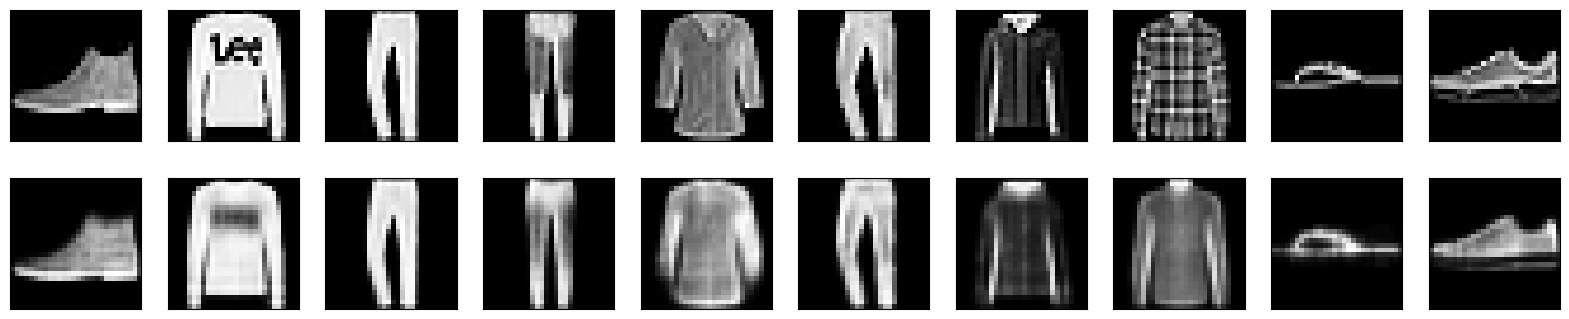

Epoch 1/100
235/235 [==============================] - 5s 17ms/step - loss: 0.3729 - val_loss: 0.3204
Epoch 2/100
235/235 [==============================] - 5s 23ms/step - loss: 0.3109 - val_loss: 0.3074
Epoch 3/100
235/235 [==============================] - 4s 16ms/step - loss: 0.3017 - val_loss: 0.3010
Epoch 4/100
235/235 [==============================] - 4s 16ms/step - loss: 0.2970 - val_loss: 0.2972
Epoch 5/100
235/235 [==============================] - 5s 23ms/step - loss: 0.2937 - val_loss: 0.2947
Epoch 6/100
235/235 [==============================] - 4s 16ms/step - loss: 0.2913 - val_loss: 0.2926
Epoch 7/100
235/235 [==============================] - 4s 16ms/step - loss: 0.2895 - val_loss: 0.2909
Epoch 8/100
235/235 [==============================] - 5s 20ms/step - loss: 0.2880 - val_loss: 0.2899
Epoch 9/100
235/235 [==============================] - 4s 18ms/step - loss: 0.2869 - val_loss: 0.2889
Epoch 10/100
235/235 [==============================] - 4s 16ms/step - loss: 0.286

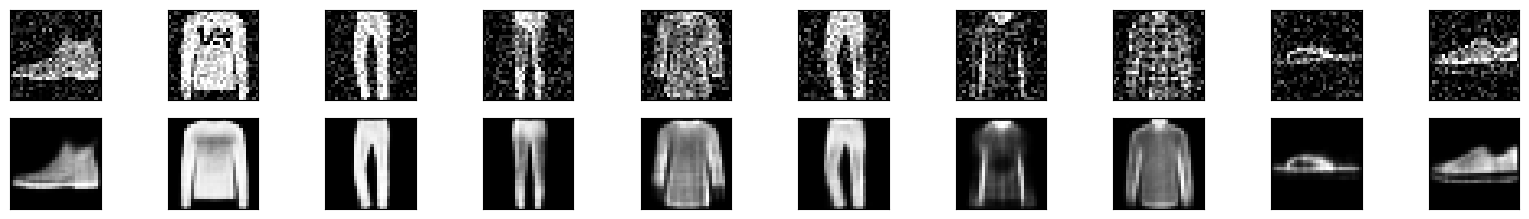

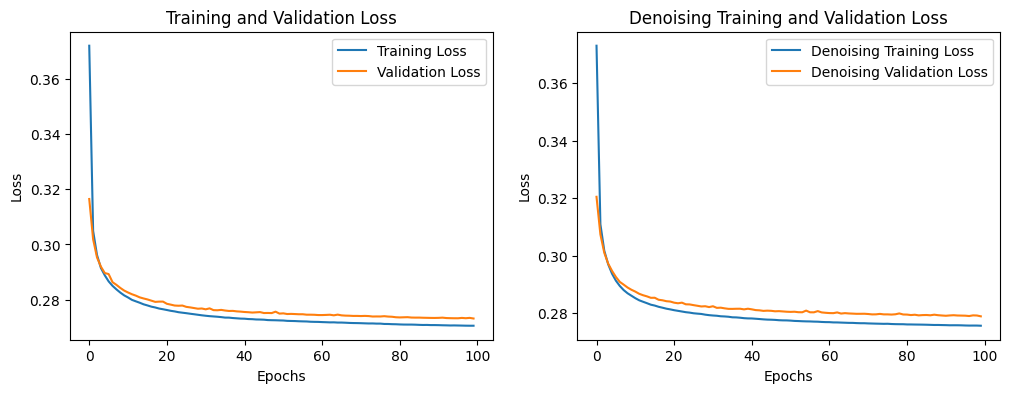

In [8]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

# Load data
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define autoencoder with an additional hidden layer
encoding_dim = 32  # Compression factor
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)  # First hidden layer
encoded = Dense(encoding_dim, activation='relu')(encoded)  # Second hidden layer (encoding)
decoded = Dense(128, activation='relu')(encoded)  # First decoding layer
decoded = Dense(784, activation='sigmoid')(decoded)  # Output layer

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')  # Changed optimizer to Adam

# Train autoencoder
history = autoencoder.fit(x_train, x_train,
                          epochs=100,  # Increased epochs
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))

# Predict and visualize
decoded_imgs = autoencoder.predict(x_test)

# Visualize original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Implement a denoising autoencoder
noise_factor = 0.2  # Reduced noise factor
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Redefine autoencoder for denoising
input_img_noisy = Input(shape=(784,))
encoded_noisy = Dense(128, activation='relu')(input_img_noisy)
encoded_noisy = Dense(encoding_dim, activation='relu')(encoded_noisy)
decoded_noisy = Dense(128, activation='relu')(encoded_noisy)
decoded_noisy = Dense(784, activation='sigmoid')(decoded_noisy)

denoising_autoencoder = Model(input_img_noisy, decoded_noisy)
denoising_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')  # Changed optimizer to Adam

# Train denoising autoencoder
history_denoising = denoising_autoencoder.fit(x_train_noisy, x_train,
                                              epochs=100,  # Increased epochs
                                              batch_size=256,
                                              shuffle=True,
                                              validation_data=(x_test_noisy, x_test))

# Predict and visualize denoised images
denoised_imgs = denoising_autoencoder.predict(x_test_noisy)

plt.figure(figsize=(20, 4))
for i in range(n):
    # Noisy image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(denoised_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Plot loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_denoising.history['loss'], label='Denoising Training Loss')
plt.plot(history_denoising.history['val_loss'], label='Denoising Validation Loss')
plt.title('Denoising Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()